# **Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform

# **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Data Preprocessing**

***Handling Missing Values***

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy="median")

In [ ]:
df['ph']=si.fit_transform(df[['ph']])

In [ ]:
df['Sulfate']=si.fit_transform(df[['Sulfate']])

In [ ]:
df['Trihalomethanes']=si.fit_transform(df[['Trihalomethanes']])

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

***Handling outliers***

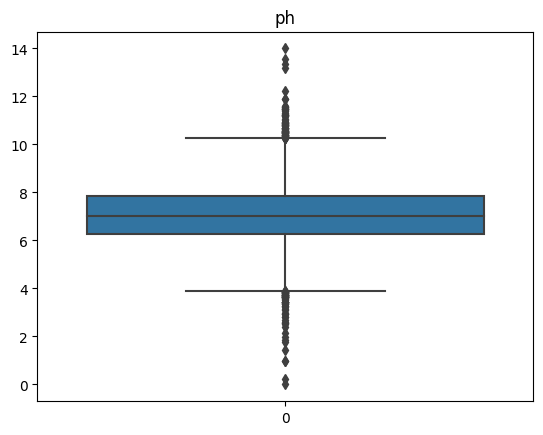

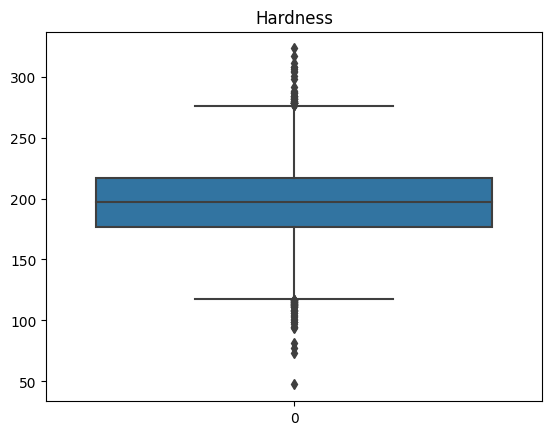

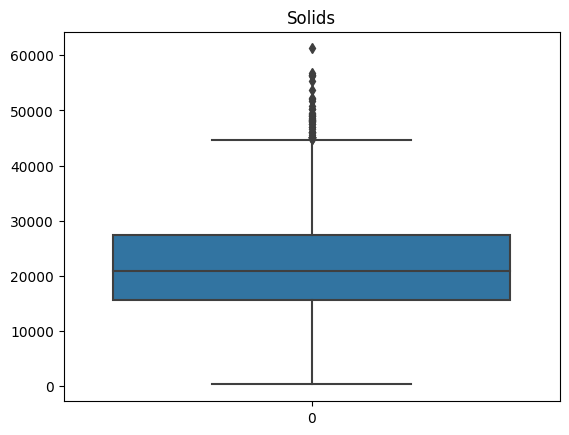

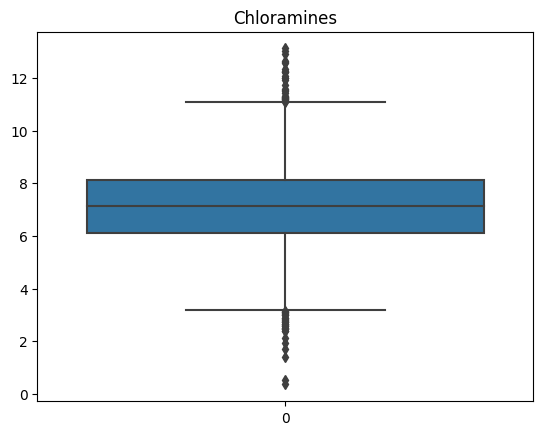

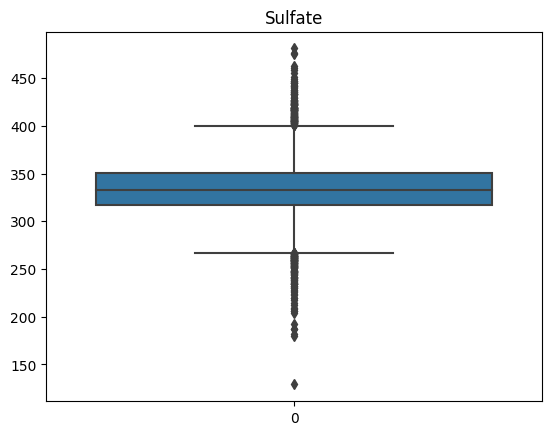

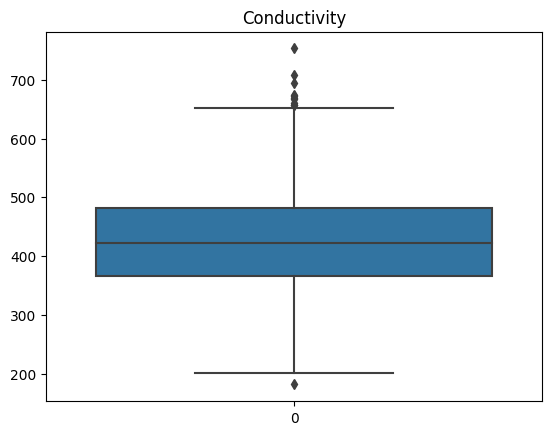

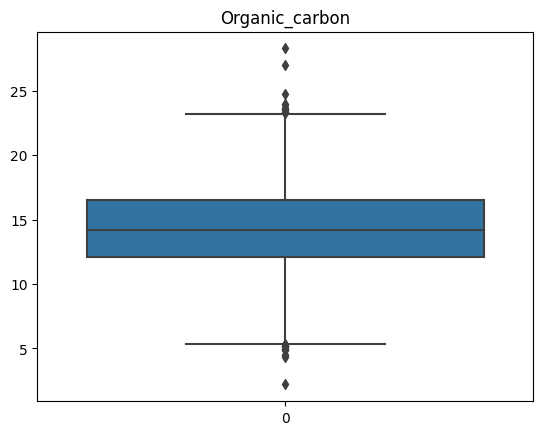

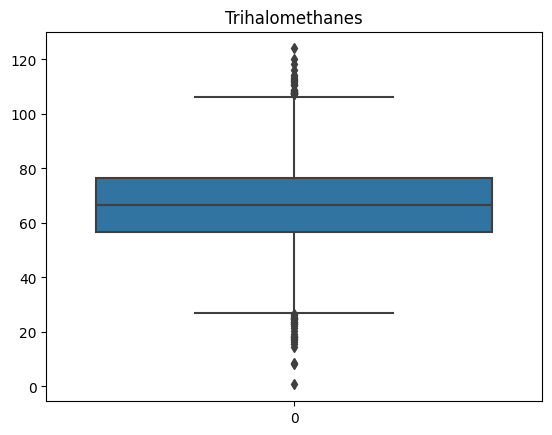

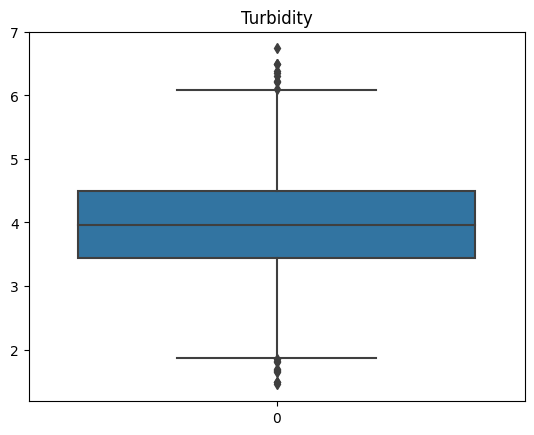

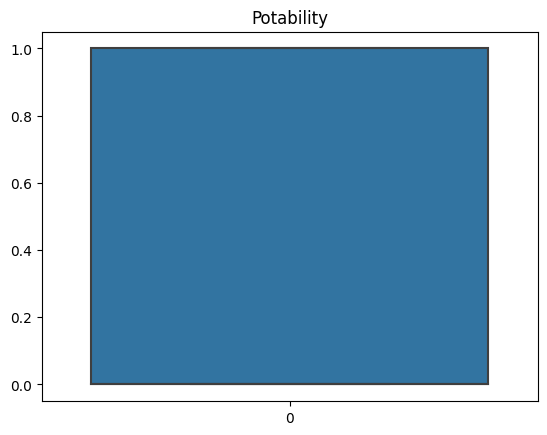

In [ ]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [ ]:
quar = df.quantile(q=[0.25,0.75],axis=0)
quar

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0.25,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.0
0.75,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.0


In [ ]:
df['Turbidity']= np.where(df[ 'Turbidity']>6,4.500320,df[ 'Turbidity'])
df['ph']= np.where(df ['ph']>10,8.062066, df['ph'])
df['Hardness']= np. where (df['Hardness']>275,216.667456, df['Hardness'])
df['Solids']= np.where(df[ 'Solids' ]>44000, 27332.762127, df['Solids'])
df['Chloramines']= np.where(df['Chloramines']>11,6.127421, df[ 'Chloramines'])
df['Sulfate']= np.where(df[ 'Sulfate' ]>400,359.950178, df['Sulfate']) 
df['Conductivity']= np.where(df[ 'Conductivity']>650,481.792304, df['Conductivity'])
df['Organic_carbon']= np.where(df['Organic_carbon' ]>23,16.557652, df['Organic_carbon']) 
df['Trihalomethanes']= np.where(df[ 'Trihalomethanes' ]>108,77.337473, df[ 'Trihalomethanes'])
df['Turbidity']= np.where(df[ 'Turbidity']<2,55.844536, df[ 'Turbidity'])
df['ph']= np.where(df['ph']<4,6.093092, df ['ph'])
df[ 'Hardness']= np.where(df['Hardness'] <120,176.850538, df['Hardness'])
df['Chloramines']= np.where(df[ 'Chloramines']<3,6.127421,df['Chloramines']) 
df['Sulfate']= np.where(df [ 'Sulfate']<260,307.699498, df[ 'Sulfate'])
df['Conductivity']= np.where(df [ 'Conductivity']<200,365.734414, df[ 'Conductivity'])
df['Organic_carbon']= np.where(df['Organic_carbon' ]<4,12.065801,df['Organic_carbon'])
df['Trihalomethanes']= np.where(df [ 'Trihalomethanes']<25,55.844536,df[ 'Trihalomethanes'])

***Splitting data into train and test***

In [ ]:
data=df.copy()

In [ ]:
features=data.drop('Potability',axis=1)
y_classlabel=data[['Potability']]

In [ ]:
features.shape

(3276, 9)

In [ ]:
y_classlabel.shape

(3276, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,y_classlabel,train_size=0.8,stratify=y_classlabel,random_state=100)

In [ ]:
x_train.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2324,6.093092,135.891978,17430.841944,6.305788,373.486425,344.398912,15.624310,68.370968,3.666824
2004,7.498372,236.714399,21736.373324,6.588566,359.950178,299.194245,20.737664,68.314347,4.242242
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759


***Handling Imbalance Data***

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN,SMOTE
ad=SMOTE(sampling_strategy=1)
x_train,y_train=ad.fit_resample(x_train,y_train)
pd.DataFrame(y_train).value_counts()


Potability
0             1598
1             1598
dtype: int64

***Scaling***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

nrm=MinMaxScaler() 
std=StandardScaler()

x_train['ph'] = std. fit_transform(x_train [['ph']]) 
x_train['Solids']=std. fit_transform(x_train [['Solids']])
x_train['Hardness']=std. fit_transform(x_train [['Hardness']])
x_train['Chloramines'] = std. fit_transform(x_train[['Chloramines']])
x_train['Sulfate']=std. fit_transform(x_train [['Sulfate']]) 
x_train['Conductivity']=std. fit_transform(x_train [ [ 'Conductivity']])
x_train['Organic_carbon']=std. fit_transform(x_train [['Organic_carbon']])
x_train['Turbidity']=std. fit_transform (x_train [ [ 'Turbidity']])
x_train['Trihalomethanes'] = std. fit_transform(x_train [ [ 'Trihalomethanes']])

In [ ]:
x_test['ph'] = std. fit_transform(x_test[['ph']])
x_test['Hardness']=std. fit_transform(x_test[['Hardness']]) 
x_test['Solids'] = std. fit_transform(x_test[[ 'Solids']])
x_test['Chloramines']=std.fit_transform(x_test[['Chloramines']]) 
x_test['Sulfate']=std. fit_transform(x_test[['Sulfate']])
x_test['Conductivity'] = std. fit_transform(x_test [ [ 'Conductivity']])
x_test['Organic_carbon']=std. fit_transform(x_test[['Organic_carbon']]) 
x_test['Trihalomethanes'] = std. fit_transform(x_test [ [ 'Trihalomethanes']])
x_test['Turbidity' ]=std. fit_transform(x_test[['Turbidity']])

x_test


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1350,1.449985,-0.016251,-0.522521,1.348471,1.686581,0.774986,1.015816,-0.305380,-0.111755
1086,0.647052,-0.110691,-0.995486,1.394496,0.356747,1.064514,-0.122327,2.279119,-0.142455
898,-0.220776,-1.926777,-0.538170,-1.997905,-0.029717,-0.616698,-1.073512,2.137044,-0.050377
1717,0.520840,-1.422982,1.749615,0.487210,0.955073,1.392842,0.620502,0.810194,-0.051119
2651,1.406621,-0.187462,-0.032792,-1.538848,1.955206,0.140908,-0.696825,-0.655969,-0.102658
...,...,...,...,...,...,...,...,...,...
996,-0.178312,-1.030052,0.271048,-0.084476,-0.036751,-0.411393,0.557372,1.457794,-0.142587
196,2.300796,0.582219,-0.808093,-2.503319,-1.348408,0.002203,1.523091,0.299214,-0.218296
1849,1.274722,1.322622,-0.141856,0.440232,1.644239,-0.066902,-0.170811,0.064658,-0.073817
506,-0.014387,0.722830,2.409534,-0.449792,-0.342337,0.976005,0.467871,-1.168292,0.018361


# ***Exploratory Data Analysis***

***Descriptive Analysis***

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.056986,196.552341,21648.764063,7.096849,333.072463,425.599593,14.251359,66.484705,4.289240,0.390110
std,1.186567,29.216947,8065.525177,1.456745,27.312258,79.424210,3.232401,14.868165,4.109753,0.487849
min,4.004248,120.021726,320.942611,3.016033,260.261206,201.619737,4.371899,25.057375,2.000757,0.000000
25%,6.277673,176.852907,15666.690297,6.127421,317.094638,365.737945,12.065922,56.647656,3.453050,0.000000
50%,7.036752,196.967627,20927.833607,7.092577,333.073546,421.884968,14.218338,66.622485,3.966126,0.000000
75%,7.870050,216.665853,27331.712003,8.075655,350.385756,481.777027,16.557295,76.666609,4.504380,1.000000
max,9.999807,274.968783,43958.678130,10.999995,399.981755,649.805765,22.891011,107.900842,55.844536,1.000000


***Visual Analysis***

***Univariate analysis***

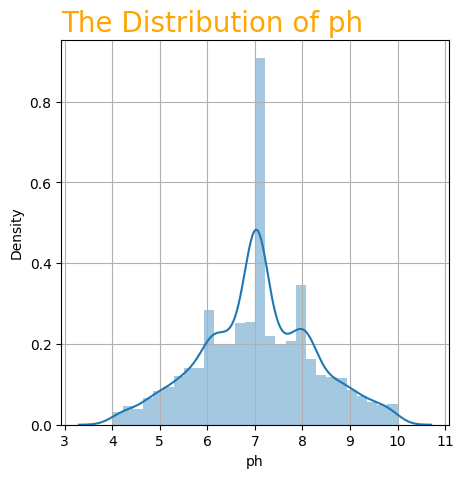

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df.ph)
plt.title("The Distribution of ph", 
          loc='left', 
          fontdict={'fontsize':20, 'color': 'orange'})
plt.grid()
plt.show()


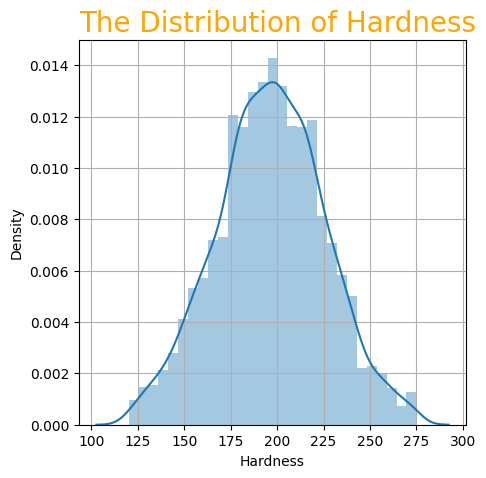

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df.Hardness)
plt.title("The Distribution of Hardness", 
          loc='left', 
          fontdict={'fontsize':20, 'color': 'orange'})
plt.grid()
plt.show()


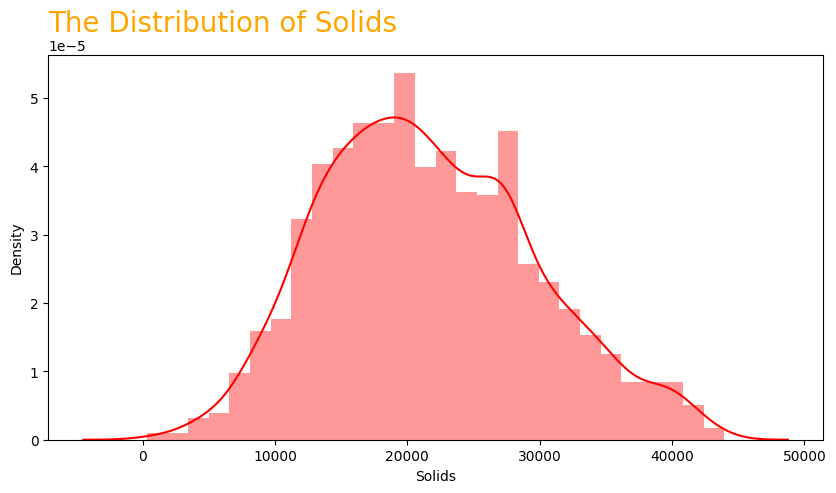

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df. Solids, hist=True, color='red')
plt.title("The Distribution of Solids", loc='left',
fontdict= {'fontsize' :20, 'color': 'orange'})
plt.show()

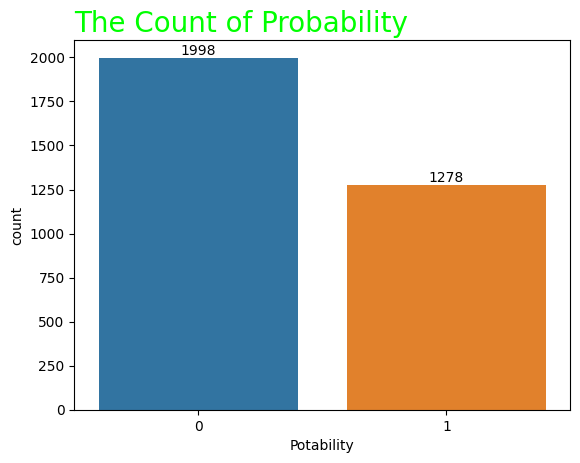

In [ ]:
b=sns.countplot(x=df.Potability, data=df) 
for container in b.containers:
  b.bar_label(container)
plt.title("The Count of Probability",
loc='left', fontdict= {'fontsize' :20, 'color': 'lime'})
plt.show()

***Bivariate analysis***

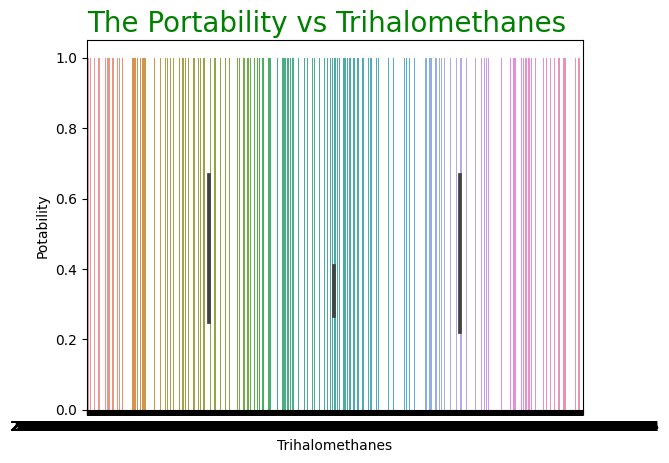

In [ ]:
sns.barplot(x=df.Trihalomethanes,y=df.Potability,data=df) 
plt.title("The Portability vs Trihalomethanes",
  loc='left',
  fontdict={'fontsize':20,'color':'green'})
plt.show()

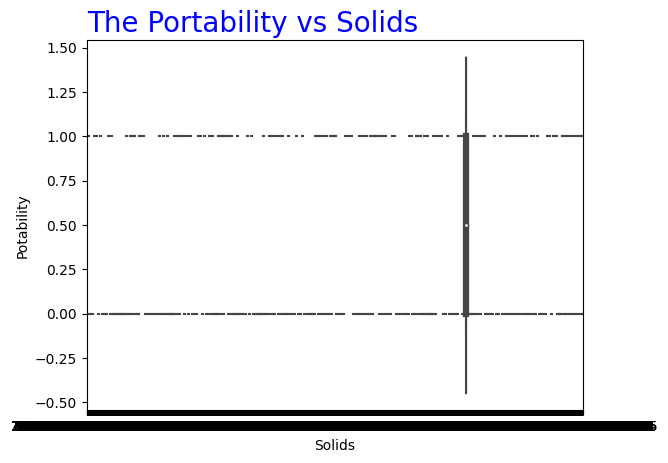

In [ ]:
sns.violinplot (x=df.Solids,y=df.Potability) 
plt.title("The Portability vs Solids", 
          loc='left',
          fontdict= {'fontsize':20,'color':'blue'})
plt.show()


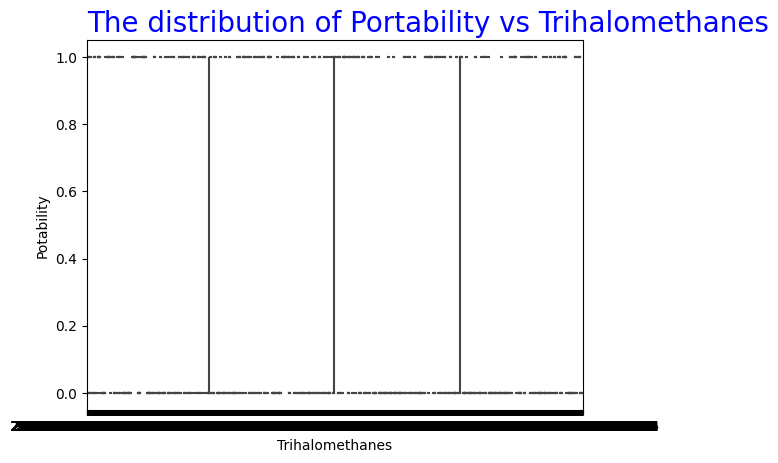

In [ ]:
sns.boxplot (x=df.Trihalomethanes,y=df.Potability) 
plt.title("The distribution of Portability vs Trihalomethanes", loc='left',fontdict={'fontsize':20,'color':'blue'})
plt.show()


***Multivariate analysis***

In [ ]:
sns.pairplot(df,hue='Potability')
plt.show()

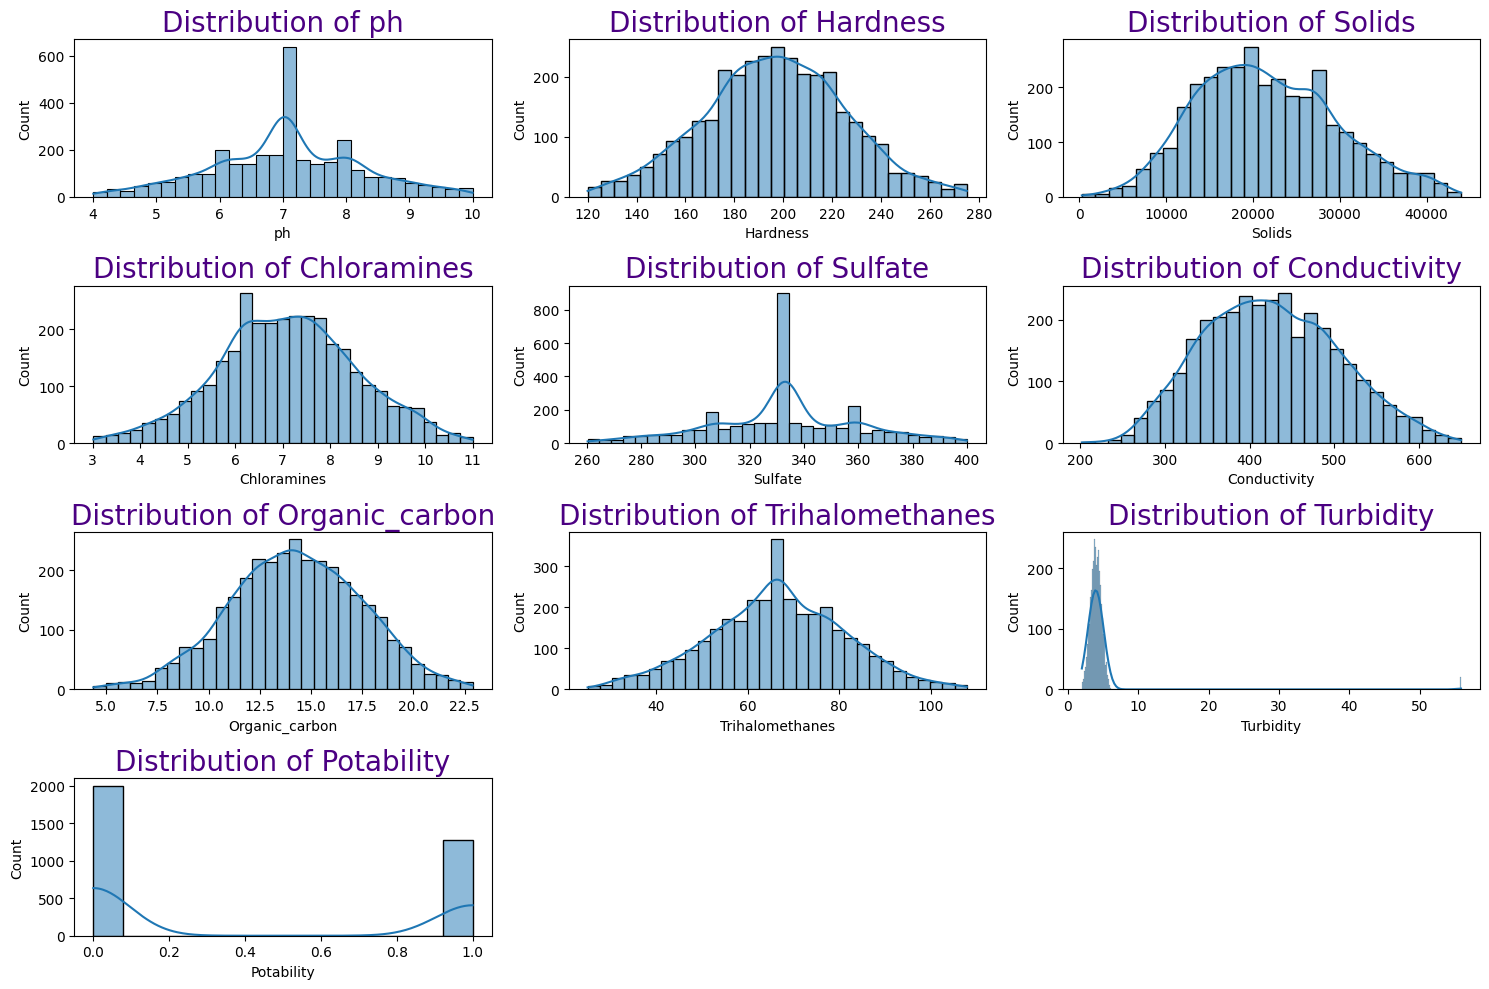

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes(exclude=['object']).columns,1): 
  plt.subplot(4,3,i)
  plt.title(f"Distribution of {col}", fontdict= {'fontsize':20, 'color': 'indigo'})
  sns.histplot(df[col], kde=True)
  plt.tight_layout()
  plt.plot()

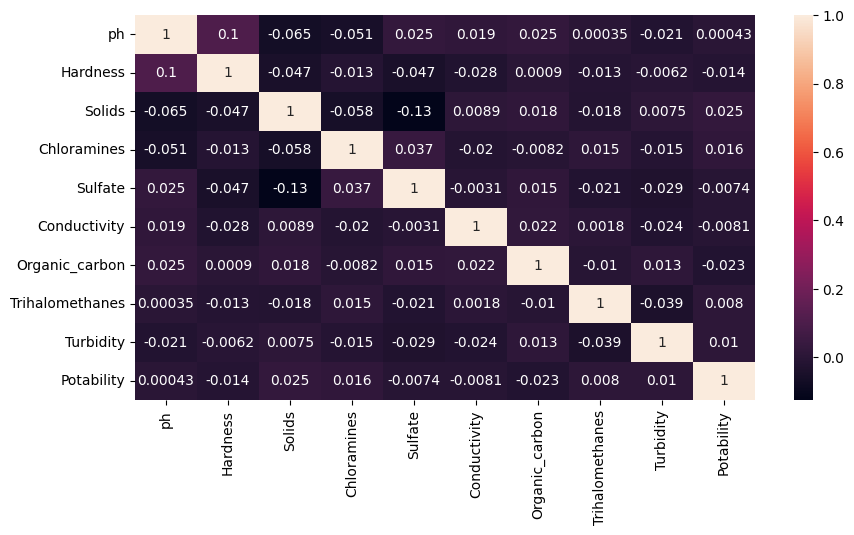

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# ***Model Building***

***Training the model in multiple algorithms***

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
dst=DecisionTreeClassifier(max_depth=445, max_features='log2')


In [ ]:
model_4=dst.fit(x_train,y_train) 
predict_decision=model_4.predict(x_test) 
accuracy_score (y_test, predict_decision)



0.5411585365853658

In [ ]:
cv=cross_val_score(dst,x_train, y_train, cv=17)
np.mean(cv)

0.6091989987484354

**Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier(n_estimators=30)
model_3=rdf.fit(x_train,y_train) 
predict_random=model_3.predict(x_test) 
accuracy_score(y_test,predict_random)



0.6051829268292683

In [ ]:
cv=cross_val_score (rdf,x_train, y_train, cv=13)
np.mean(cv)


0.6730826664624575

**KNN Model**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=18) 
model_1=knn.fit(x_train,y_train) 
predict_knn=model_1.predict(x_test) 
accuracy_score(y_test,predict_knn)

0.5853658536585366

In [ ]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       400
           1       0.47      0.56      0.51       256

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.59      0.59       656



In [ ]:
print(confusion_matrix(y_test, predict_knn))

[[240 160]
 [112 144]]


**Xgboost model**

In [ ]:
from xgboost import XGBClassifier 
xgb=XGBClassifier()
model_6=dst.fit(x_train,y_train) 
predict_xgb=model_6.predict(x_test) 
accuracy_score(y_test, predict_xgb)

0.5533536585365854

# ***Performance Testing & Hyperparameter Tuning***

***Testing Model With Multiple Evaluation Metrics***

**Compare the Model**

In [ ]:
def comparison (x_train,x_test,y_train,y_test):
  knn=KNeighborsClassifier()
  model_1=knn.fit(x_train,y_train) 
  predict_knn=model_1.predict(x_test)
  print("KNN Accuracy Score: ",accuracy_score(y_test, predict_knn))
  print("classification Report: ")
  print(classification_report(y_test, predict_knn))
  print("Confusion Matrix: ")
  print(confusion_matrix(y_test, predict_knn)) 
  gnb=GaussianNB()
  model_2=gnb.fit(x_train,y_train) 
  predict_log=model_2.predict(x_test)
  print("Naive Bayes Accuracy Score: ",accuracy_score (y_test, predict_log))
  print("Classification Report: ") 
  print(classification_report(y_test, predict_log))
  print("Confusion Matrix: ") 
  print(confusion_matrix(y_test, predict_log))
  rdf=RandomForestClassifier() 
  model_3=rdf.fit(x_train,y_train)
  predict_random=model_3.predict(x_test)
  print("Random Forest Accuracy Score: ",accuracy_score(y_test, predict_random))
  print("Classification Report: ") 
  print(classification_report (y_test, predict_random))
  print("Confusion Matrix: ")
  print(confusion_matrix(y_test, predict_random))
  dst=DecisionTreeClassifier (max_depth-445, max_features='log2')
  model_4=dst.fit(x_train,y_train)
  predict_decision=model_4.predict(x_test) 
  print("Decision Tree Accuracy Score: ",accuracy_score(y_test, predict_decision))
  print("Classification Report: ")
  print(classification_report(y_test, predict_decision))
  print("Confusion Matrix: ") 
  print(confusion_matrix(y_test, predict_decision)) 
  xgb=XGBClassifier()
  model_6=dst.fit(x_train,y_train)
  predict_xgb=model_6.predict(x_test) 
  print("XGBoost Accuracy Score: ", accuracy_score (y_test, predict_xgb))
  print("Classification Report: ") 
  print(classification_report(y_test, predict_xgb))

***Comparing Model Accuracy Before & After Applying Hyperparameter Tuning***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace (start=100,stop=200,num=10)] 
max_features=['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace (10, 500,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8] 
random_grid={'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'criterion': ['entropy', 'gini']}
print(random_grid)


{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3)
rf_randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]})

In [ ]:
RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),n_iter=100,
                   param_distributions={'criteration': ['entropy','gini'],
                                       'max_depth':[10,64,118,173,227,
                                                    282,336,391,445,500],
                                       'max_features': ['auto', 'sqrt',
                                                        'log2']})

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criteration': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']})

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
random_search = RandomizedSearchCV(model, random_grid, n_iter=10)
random_search.fit(x_train, y_train)
best_random_grid = random_search.best_estimator_
y_pred = best_random_grid.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Classification report:\n{}".format(classification_report(y_test, y_pred)))


[[263 137]
 [125 131]]
Accuracy Score: 0.600609756097561
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       400
           1       0.49      0.51      0.50       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



# ***Model Deployment***

***Save The Best Model***

In [ ]:
import joblib
joblib.dump(best_random_grid,r"C:\Users\Muthuraj\Documents\IBM\water_quality.joblib")

['C:\\Users\\Muthuraj\\Documents\\IBM\\water_quality.joblib']

In [ ]:
from google.colab import files
files.download(r"C:\Users\Muthuraj\Documents\IBM\water_quality.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


MAE: 0.39939024390243905
MSE: 0.39939024390243905
RMSE: 0.6319732936623501
R2 score: -0.6784374999999998
